In [ ]:
Topic = "Determining the Predictors of Electric Vehicle Prices"
Group = "Group 4"

Member1 = "Omosalewa Adebooye"
Member2 = "Joshua Linner"
Member3 = "Jasmine Sun"

# Import Libraries

In [ ]:
import requests
import bs4
from bs4 import BeautifulSoup
from IPython.display import display
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from datetime import datetime, timedelta, timezone
import re
import matplotlib.pyplot as plt

# Web Scraping

In [ ]:

#Takes a div element, scrapes the div and returns a dictionary of values

def scrape_div(car_div):

  #fetching data from div and setting dict
    car_title = car_div.findChild('a', {'class' : 'title'})

    car_dict = {

        'Make' : car_title.findChildren('span')[0].text,

        'Model' : car_title.findChildren('span')[1].text,

        'Acceleration' : car_div.findChild('span', {'class': 'acceleration'}).text,

        'MaxSpeed' : car_div.findChild('span', {'class' :'topspeed'}).text,

        'Range' : car_div.findChild('span', {'class': 'erange_real'}).text,

        'Efficiency' : car_div.findChild('span', {'class': 'efficiency'}).text,

        'Seats' : car_div.findChildren('span', {'title': 'Number of seats'})[1].text,

        'ChargingSpeed' : car_div.findChild('span', {'class': 'fastcharge_speed hidden'}).text,

        'PriceUK' : car_div.findChild('span', {'class' : 'country_uk'}).text,

        'PriceG' : car_div.findChild('span', {'class' : 'country_de'}).text,

        'PriceN' : car_div.findChild('span', {'class' : 'country_nl'}).text,

        'Battery' : car_div.findChild('span', {'class' : 'battery'}).text,


    }

    return car_dict

In [ ]:
#Defining method to scrape data from the site
#Returns a list of dictionaries containing data scraped from the site
#Extracted: car make, model, acceleration, top speed, range on full charge, efficiency, number of seats, useable battery, fast charge speed, price in the UK, price in Germany, and price in the Netherlands
def scrape_site(url):

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    page = requests.get(url, headers=headers)

    soup = BeautifulSoup(page.content, 'html.parser')

    car_divs_list = soup.find_all('div', {'class': 'list-item'})

    listOfDicts = []

    for i in range(len(car_divs_list)):

       listOfDicts.append(scrape_div(car_divs_list[i]))

    return listOfDicts



In [ ]:
#Calling method to scrape site


url = 'https://ev-database.org/#sort:path~type~order=.rank~number~desc|rs-price:prev~next=10000~100000|rs-range:prev~next=0~1000|rs-fastcharge:prev~next=0~1500|rs-acceleration:prev~next=2~23|rs-topspeed:prev~next=110~350|rs-battery:prev~next=10~200|rs-towweight:prev~next=0~2500|rs-eff:prev~next=100~350|rs-safety:prev~next=-1~5|paging:currentPage=0|paging:number=10'

car_data_list = scrape_site(url)

car_data = pd.DataFrame(car_data_list)



In [ ]:
car_data.head()

,Make,Model,Acceleration,MaxSpeed,Range,Efficiency,Seats,ChargingSpeed,PriceUK,PriceG,PriceN,Battery
0,Tesla,Model 3,6.1 sec,201 km/h,415 km,139 Wh/km,5,690,"£39,990","€43,470","€43,490",57.5
1,BYD,ATTO 3,7.3 sec,160 km/h,330 km,183 Wh/km,5,370,"£37,195","€37,990","€38,990",60.5
2,Tesla,Model 3 Long Range Dual Motor,4.4 sec,201 km/h,500 km,150 Wh/km,5,770,"£49,990","€52,470","€51,490",75
3,Kia,EV3 Long Range,7.7 sec,170 km/h,455 km,171 Wh/km,5,570,"£35,995","€41,390","€41,495",78
4,Tesla,Model Y Long Range Dual Motor,5.0 sec,217 km/h,435 km,172 Wh/km,5,670,"£52,990","€55,970","€52,990",75


In [ ]:
#Data Cleaning
#Run just once


#Removing suffix units from data values
car_data['Acceleration'] = pd.to_numeric(car_data['Acceleration'].str.replace(' sec', ''), errors='coerce')

car_data['MaxSpeed'] = pd.to_numeric(car_data['MaxSpeed'].str.replace(' km/h', ''), errors='coerce')

car_data['Range'] = pd.to_numeric(car_data['Range'].str.replace(' km', ''), errors='coerce')

car_data['Efficiency'] = pd.to_numeric(car_data['Efficiency'].str.replace(' Wh/km', ''), errors='coerce')

#Converting other numerical variables from object to numbers
car_data['Seats'] = pd.to_numeric(car_data['Seats'])

car_data['ChargingSpeed'] = pd.to_numeric(car_data['ChargingSpeed'])

car_data['Battery'] = pd.to_numeric(car_data['Battery'])

#Cleaning currency data

car_data['PriceUK'] = car_data['PriceUK'].replace('\£', '', regex=True).str.replace('*', '').str.replace(',', '')

car_data['PriceG'] = car_data['PriceG'].replace('\€', '', regex=True).str.replace('*', '').str.replace(',', '')

car_data['PriceN'] = car_data['PriceN'].replace('\€', '', regex=True).str.replace('*', '').str.replace(',', '')

car_data['PriceUK'] = pd.to_numeric(car_data['PriceUK'], errors = 'coerce')

car_data['PriceG'] = pd.to_numeric(car_data['PriceG'], errors = 'coerce')

car_data['PriceN'] = pd.to_numeric(car_data['PriceN'], errors = 'coerce')


In [ ]:
car_data.info()

print(car_data.head())

#Saving document to csv
#date = datetime.now().date()
#car_data.to_csv(f"Scraped Car Data {date}.csv", encoding="utf-8-sig")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           412 non-null    object 
 1   Model          412 non-null    object 
 2   Acceleration   412 non-null    float64
 3   MaxSpeed       412 non-null    int64  
 4   Range          412 non-null    int64  
 5   Efficiency     412 non-null    int64  
 6   Seats          412 non-null    int64  
 7   ChargingSpeed  411 non-null    float64
 8   PriceUK        302 non-null    float64
 9   PriceG         398 non-null    float64
 10  PriceN         365 non-null    float64
 11  Battery        412 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 38.8+ KB
    Make                          Model  Acceleration  MaxSpeed  Range  \
0  Tesla                       Model 3            6.1       201    415   
1    BYD                        ATTO 3            7.3       160    3

In [ ]:
# Calculate a factor for converting price in Netherlands to a price in Germany
percentage_diff = ((car_data['PriceG'] - car_data['PriceN']) / car_data['PriceN'])
NtoG = 1 + percentage_diff.mean()

# Calculate a factor for converting price in United Kingdom to a price in Germany
percentage_diff = ((car_data['PriceG'] - car_data['PriceUK']) / car_data['PriceUK'])
UKtoG = 1 + percentage_diff.mean()

print(NtoG)
print(UKtoG)

0.9859380684306964
1.1096503362334442


In [ ]:
# Fill null values with adjusted prices in Netherlands
car_data['PriceG'] = car_data['PriceG'].fillna(car_data['PriceN'] * NtoG)
# Fill remaining null values with adjusted prices in UK (pounds)
car_data['PriceG'] = car_data['PriceG'].fillna(car_data['PriceUK'] * UKtoG)

# Fill null values with the mean
car_data['ChargingSpeed'] = car_data['ChargingSpeed'].fillna(car_data['ChargingSpeed'].mean())

# Check columns for any remaining missing values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           412 non-null    object 
 1   Model          412 non-null    object 
 2   Acceleration   412 non-null    float64
 3   MaxSpeed       412 non-null    int64  
 4   Range          412 non-null    int64  
 5   Efficiency     412 non-null    int64  
 6   Seats          412 non-null    int64  
 7   ChargingSpeed  412 non-null    float64
 8   PriceUK        302 non-null    float64
 9   PriceG         412 non-null    float64
 10  PriceN         365 non-null    float64
 11  Battery        412 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 38.8+ KB




```
# This is formatted as code
```

# Analysis

In [ ]:
car_data.describe()

,Acceleration,MaxSpeed,Range,Efficiency,Seats,ChargingSpeed,PriceUK,PriceG,PriceN,Battery
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,302.000000,412.000000,365.000000,412.000000
mean,6.835194,185.750000,389.502427,190.980583,5.259709,599.343066,62336.105960,67402.867529,71127.926027,74.051699
std,2.773238,35.125124,100.225694,28.104595,1.005110,251.228237,37452.111283,39017.806350,44007.854585,20.429572
min,2.200000,125.000000,135.000000,139.000000,2.000000,170.000000,14995.000000,16900.000000,18950.000000,21.300000
25%,4.700000,160.000000,320.000000,170.750000,5.000000,420.000000,37348.750000,44365.000000,43350.000000,60.000000
50%,6.500000,180.000000,397.500000,185.000000,5.000000,570.000000,51047.500000,55504.500000,56990.000000,76.150000
75%,8.325000,202.000000,465.000000,205.000000,5.000000,720.000000,70536.250000,75096.000000,83480.000000,90.000000
max,19.100000,325.000000,690.000000,322.000000,9.000000,1300.000000,330000.000000,379015.000000,396275.000000,123.000000


In [ ]:
car_data = car_data.sort_values(by=['PriceG'])
car_data.tail()

,Make,Model,Acceleration,MaxSpeed,Range,Efficiency,Seats,ChargingSpeed,PriceUK,PriceG,PriceN,Battery
404,Porsche,Taycan Turbo S Sport Turismo,2.4,260,460,211,5,1070.0,162100.0,210800.0,219900.0,97.0
387,Porsche,Taycan Turbo S Cross Turismo,2.5,250,475,204,5,1100.0,162500.0,211300.0,220400.0,97.0
330,Porsche,Taycan Turbo GT Weissach,2.2,305,475,204,2,1100.0,186300.0,240000.0,249900.0,97.0
202,Porsche,Taycan Turbo GT,2.3,290,475,204,5,1100.0,186300.0,240000.0,249900.0,97.0
56,Rolls-Royce,Spectre,4.5,250,465,219,4,540.0,330000.0,379015.0,396275.0,102.0


count       412.000000
mean      67402.867529
std       39017.806350
min       16900.000000
25%       44365.000000
50%       55504.500000
75%       75096.000000
max      379015.000000
Name: PriceG, dtype: float64


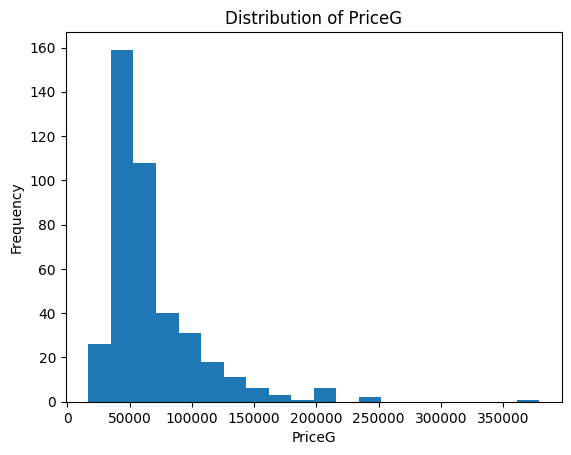

In [ ]:
# Analyzing the 'PriceG' column

print(car_data['PriceG'].describe())

# Create a histogram
plt.hist(car_data['PriceG'], bins=20)
plt.xlabel('PriceG')
plt.ylabel('Frequency')
plt.title('Distribution of PriceG')
plt.show()

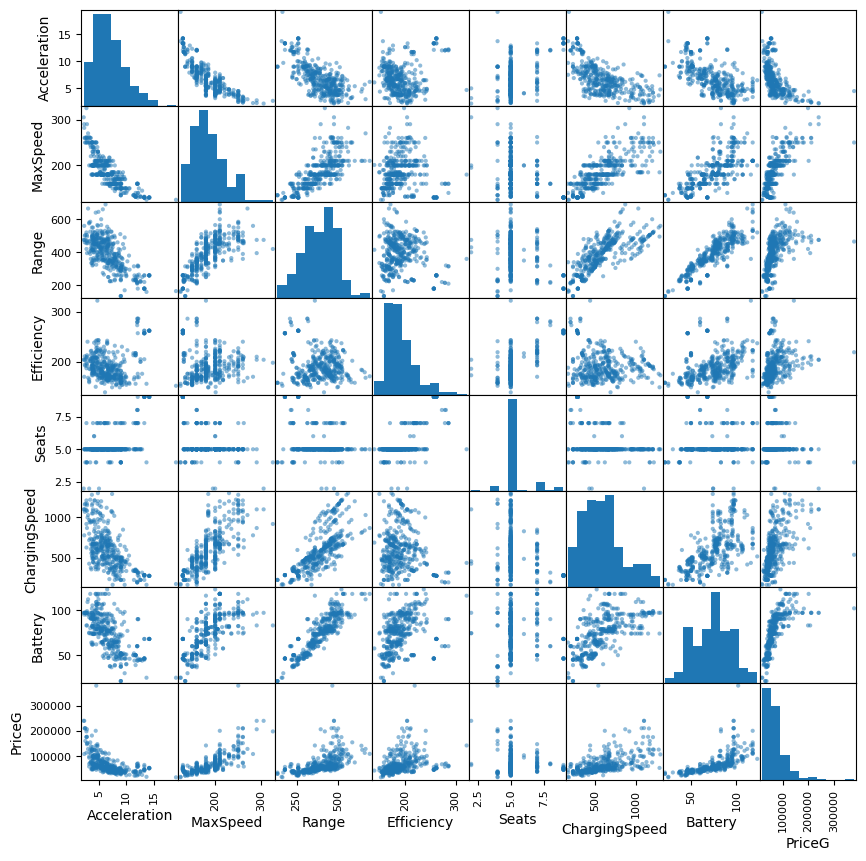

In [ ]:
from pandas.plotting import scatter_matrix

# Check the relationship between variables
scatter_matrix(car_data[['Acceleration', 'MaxSpeed', 'Range', 'Efficiency', 'Seats', 'ChargingSpeed', 'Battery', 'PriceG']],figsize=(10, 10))
plt.show()

In [ ]:
# Calculating the correlation of each feature to the priceG
corr_matrix = car_data[['Acceleration', 'MaxSpeed', 'Range', 'Efficiency', 'Seats', 'ChargingSpeed', 'Battery', 'PriceG']].corr()['PriceG']

corr_matrix

,PriceG
Acceleration,-0.560562
MaxSpeed,0.754397
Range,0.550209
Efficiency,0.312558
Seats,-0.090453
ChargingSpeed,0.550684
Battery,0.686322
PriceG,1.000000


In [ ]:
# Use a histogram to understand the distribution of the 'Seats' variable
print(car_data['Seats'].value_counts())

Seats
5    338
7     32
4     19
9     15
2      3
8      3
6      2
Name: count, dtype: int64


In [ ]:
# Calculate the correlation coefficient between 'Range' and 'Battery'
corr_range_battery = car_data['Range'].corr(car_data['Battery'])
print("Correlation Coefficient between 'Range' and 'Battery'")
print(corr_range_battery)

# Calculate the correlation coefficient between 'Range' and 'Battery'

Correlation Coefficient between 'Range' and 'Battery'
0.8824908618012216


Text(0.5, 1.0, 'Correlation Scatterplot of Battery and Range')

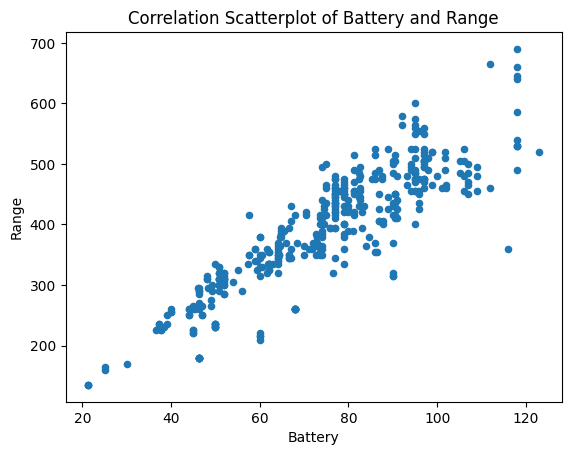

In [ ]:
car_data.plot.scatter(x='Battery',y= 'Range')
plt.title("Correlation Scatterplot of Battery and Range")

In [ ]:
# Calculate the correlation coefficient between 'Acceleration' and 'MaxSpeed'
corr_acceleration_maxspeed = car_data['Acceleration'].corr(car_data['MaxSpeed'])
print("Correlation Coefficient between 'Acceleration' and 'MaxSpeed'")
print(corr_acceleration_maxspeed)

Correlation Coefficient between 'Acceleration' and 'MaxSpeed'
-0.8208128318548849


Text(0.5, 1.0, 'Correlation Scatterplot of Acceleration and Maxspeed')

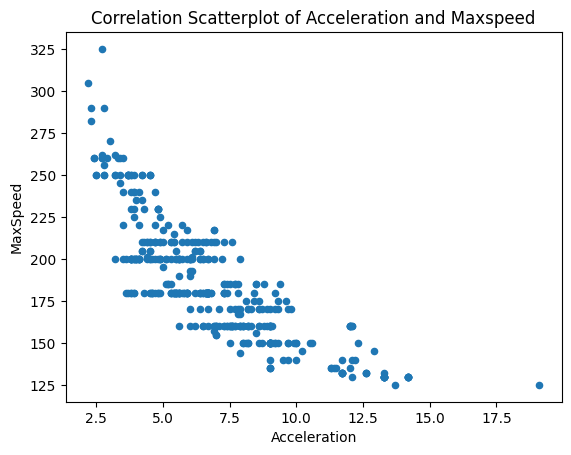

In [ ]:
car_data.plot.scatter(x='Acceleration',y= 'MaxSpeed')
plt.title("Correlation Scatterplot of Acceleration and Maxspeed")

# Regression using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = car_data[['Acceleration', 'MaxSpeed', 'Range', 'Efficiency', 'Seats', 'ChargingSpeed', 'Battery']][:-1]
y = car_data['PriceG'][:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred

array([ 69017.38795056,  33884.27009506,  59585.4       ,  75177.78385515,
        59745.58985304,  51524.64767917,  67760.81213548,  49617.261504  ,
        55790.5       ,  48503.63      ,  78987.16      ,  47594.0861052 ,
        63399.17656902, 124276.535     ,  80446.42078685, 177618.65      ,
       146143.54      , 132889.21      ,  76956.74657134,  48781.45      ,
        40197.03      ,  48681.06      ,  32427.35833333, 111255.85      ,
        26420.        ,  35537.655564  ,  96448.85461463, 170653.99      ,
        50481.48936752,  47339.81616162,  38145.14333333,  36856.01285629,
        57458.55130423, 117984.655     , 112727.25      ,  38932.17142857,
        70857.23513074,  53778.43866131,  27392.03      , 167382.79      ,
        60018.46679739,  57810.84427946,  46495.45477562,  60671.73589792,
        41383.52977562,  50991.78565227,  53299.42      ,  43924.41741867,
        48104.15      ,  53778.43866131,  41445.72977562,  66812.84694705,
        42732.44761905,  

In [ ]:
y_test

,PriceG
338,62897.0
57,35900.0
186,53255.0
127,71200.0
380,63200.0
...,...
336,44950.0
321,69200.0
259,47000.0
121,28990.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #RMSE: root mean square error
print("R²:", r2_score(y_test, y_pred))

RMSE: 13665.851097013741
R²: 0.9128463948699024


In [ ]:
y_test.std()

46572.13268275466

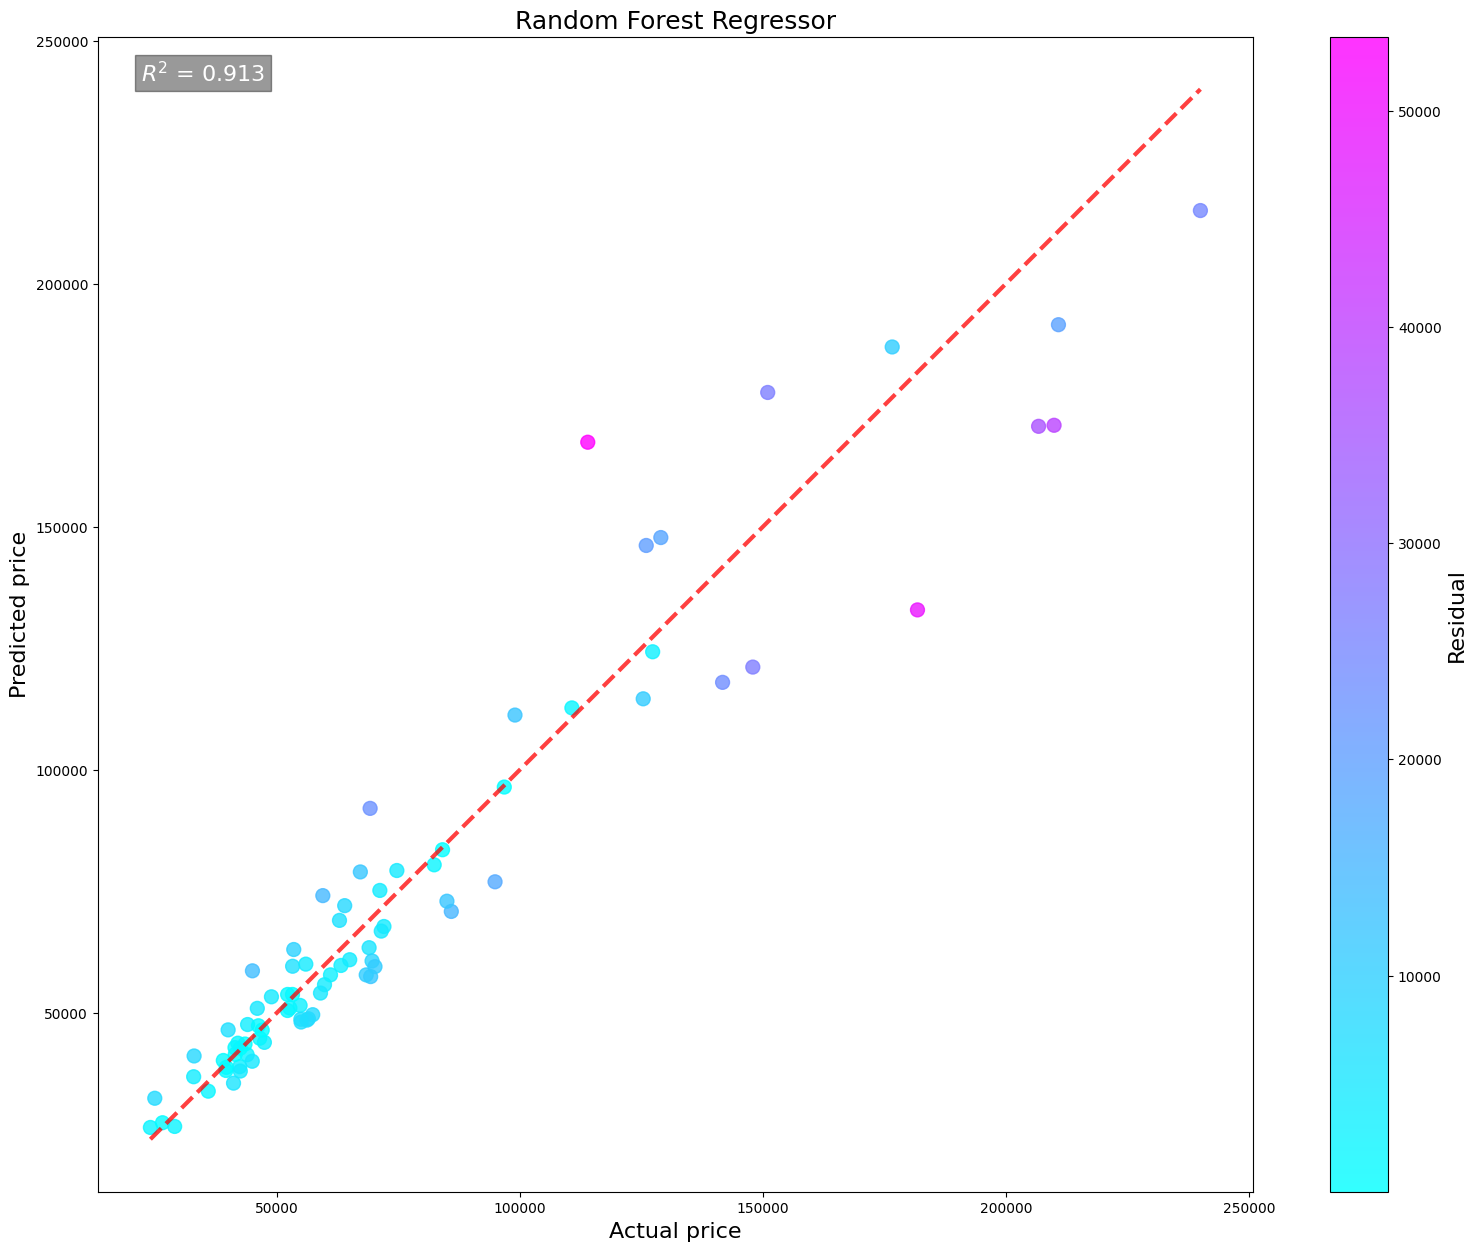

In [ ]:
def plot_regression(y_true, y_pred, title="", axis_label=""):
  y_residual = np.abs(y_true-y_pred)
  fig, ax = plt.subplots(figsize=(20,15))
  scatter = ax.scatter(x=y_true, y=y_pred, c=y_residual, cmap="cool", marker="o", s=100, alpha=0.8)
  ax.set_xlabel("Actual %s"%axis_label, fontsize=16); ax.set_ylabel("Predicted %s"%axis_label, fontsize=16);
  ax.set_title(title, fontsize=18);
  ax.set_aspect(1)
  cbar = plt.colorbar(scatter)
  cbar.ax.set_ylabel("Residual", rotation=90, fontsize=16)
  ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], "r--", alpha=0.75, linewidth=3)
  from sklearn.metrics import r2_score
  R_squared = r2_score(y_true, y_pred) #forest.score(X_df, y_df)
  plt.figtext(0.22,0.85,"$R^{2}$ = "+str(R_squared.round(3)), fontsize=16, ha="center",backgroundcolor=(0,0,0,0.4),color="w")

plot_regression(y_test, y_pred, title="Random Forest Regressor", axis_label="price")

In [ ]:
# Finding key drivers of the machine learning model
df_imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
Battery,0.413803
MaxSpeed,0.332485
Acceleration,0.162915
Efficiency,0.032511
Seats,0.023899
Range,0.017463
ChargingSpeed,0.016924


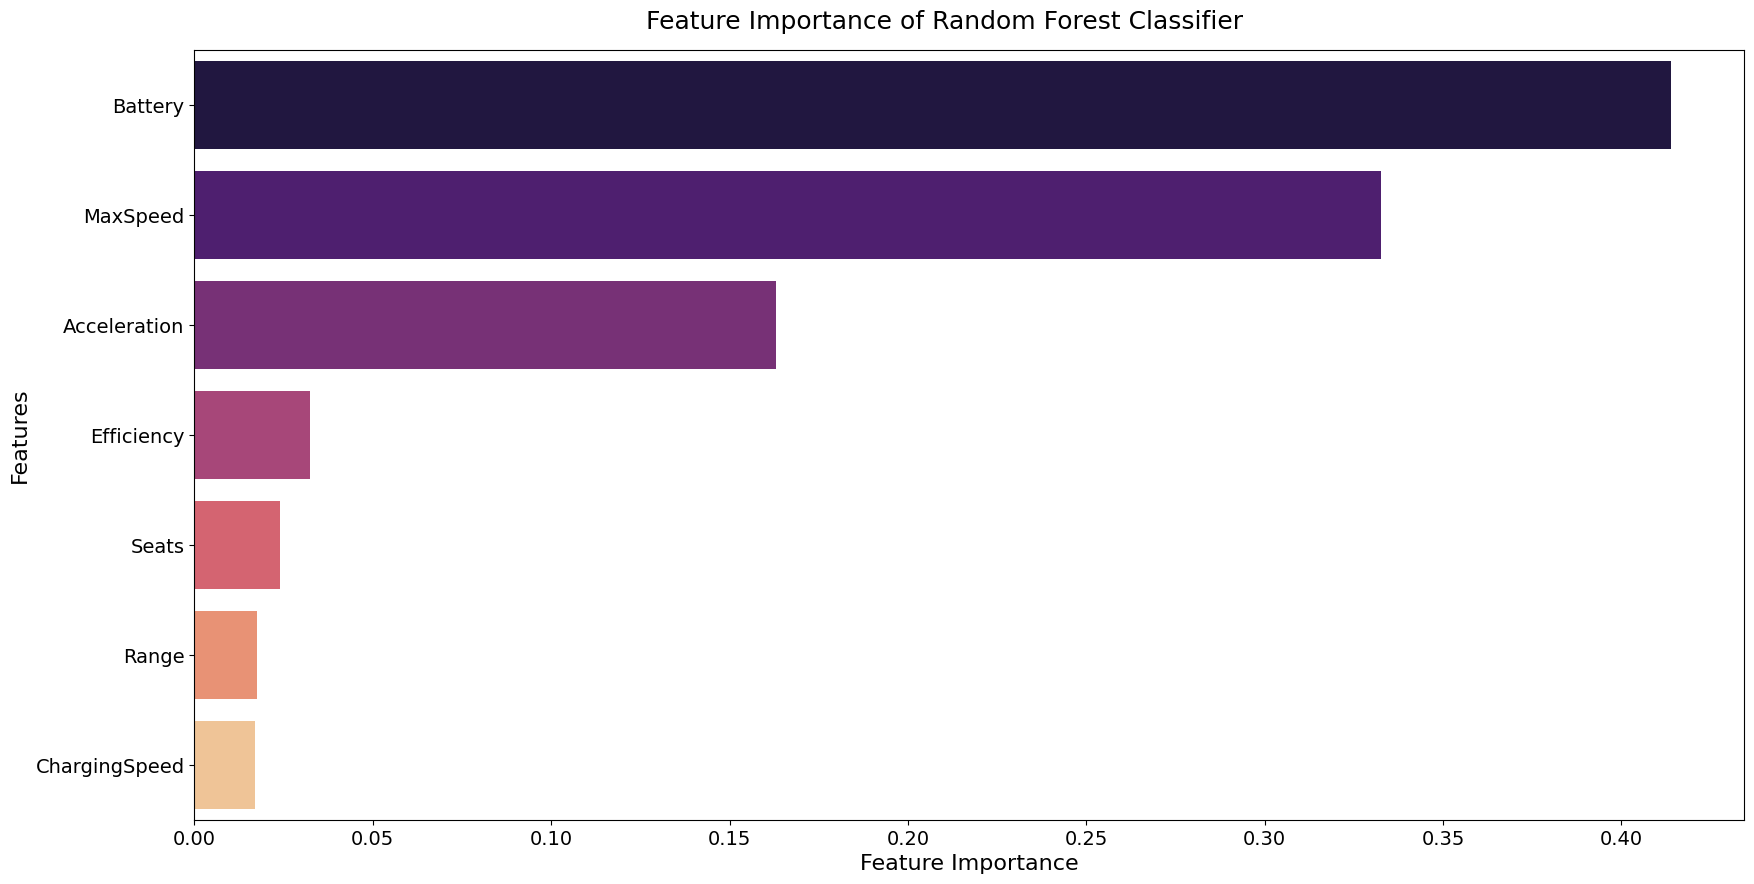

In [ ]:
import seaborn as sns

# Plot the feature importance
Features = df_imp.index

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=Features, data=df_imp, hue=df_imp.index, palette="magma")
plt.xlabel("Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);

# Uncomment to save figure to google drive
#from google.colab import files
#plt.savefig("Feature Importance of Random Forest Classifier.png")
#files.download("Feature Importance of Random Forest Classifier.png")

In [ ]:
by_make = car_data.groupby('Make')

In [ ]:
# Number of unique car brands in the dataset
print("Number of Car Makes:")
print(len(by_make))

Number of Car Makes:
54


In [ ]:
# Calculate percentage of Make with count of one
make_count = by_make['Make'].value_counts().sort_values(ascending=False)
print("Percentage of Makes with only one model:")
print(len(make_count[make_count == 1])/ len(make_count) * 100)

# Average number of Models for each Make
print("Average count of Make:")
print(make_count.mean())

Percentage of Makes with only one model:
25.925925925925924
Average count of Make:
7.62962962962963


In [ ]:
# Group data by 'Make' to determine top 5 most expensive makes using the mean price of each make
by_make['PriceG'].aggregate(['mean', 'count']).sort_values(by='mean', ascending=False).head()

,mean,count
Make,,
Rolls-Royce,379015.000000,1
Maserati,176408.666667,3
Porsche,143931.454545,22
Lotus,125885.000000,6
Lucid,104333.333333,3


In [ ]:
# Top 5 'Battery' by 'Make' using the mean 'Battery' of each 'Make'
by_make['Battery'].aggregate('mean').sort_values(ascending=False).head()

,Battery
Make,
Lotus,103.950000
Rolls-Royce,102.000000
Cadillac,102.000000
Voyah,100.000000
VinFast,99.466667


In [ ]:
# Correlation between 'PriceG' and 'Battery'
corr_price_battery = car_data['PriceG'].corr(car_data['Battery'])
print("Correlation Coefficient between 'PriceG' and 'Battery'")
print(corr_price_battery)

# Top 5 most expensive makes and their battery capacity
by_make[['PriceG','Battery']].aggregate('mean').sort_values(by='PriceG', ascending=False).head()

Correlation Coefficient between 'PriceG' and 'Battery'
0.6863222826143321


,PriceG,Battery
Make,,
Rolls-Royce,379015.000000,102.000000
Maserati,176408.666667,87.000000
Porsche,143931.454545,93.963636
Lotus,125885.000000,103.950000
Lucid,104333.333333,98.666667


In [ ]:
# Correlation between 'PriceG' and 'Range'
corr_price_range = car_data['PriceG'].corr(car_data['Range'])
print("Correlation Coefficient between 'PriceG' and 'Range'")
print(corr_price_range)

# Top 5 most expensive makes and their Range
by_make[['PriceG','Range']].aggregate('mean').sort_values(by='Range', ascending=False).head()

Correlation Coefficient between 'PriceG' and 'Range'
0.550208596326742


,PriceG,Range
Make,,
Lucid,104333.333333,603.333333
Porsche,143931.454545,490.227273
Lotus,125885.000000,489.166667
Voyah,73107.307774,480.000000
Rolls-Royce,379015.000000,465.000000


In [ ]:
# Correlation between 'Efficiency' and 'PriceG'
corr_price_efficiency = car_data['PriceG'].corr(car_data['Efficiency'])
print("Correlation Coefficient between 'Efficiency' and 'PriceG'")
print(corr_price_efficiency)

# Top 5 most efficient makes
by_make[['Efficiency','PriceG']].aggregate('mean').sort_values(by='Efficiency',ascending=False).head()

Correlation Coefficient between 'Efficiency' and 'PriceG'
0.31255804618026


,Efficiency,PriceG
Make,,
Hongqi,241.666667,83142.514081
Maxus,230.000000,68990.000000
Toyota,225.714286,53119.712509
VinFast,224.333333,67223.333333
Jaguar,223.000000,92400.000000
